<a href="https://colab.research.google.com/github/Sophiat-O/c02_emission_analysis/blob/test/%5BProject_AI%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2021%20Fuel%20Consumption%20Ratings.csv", header=[0, 1], encoding="latin-1")
df = df.dropna(subset=[("Model", "Unnamed: 2_level_1")]).dropna(axis=1)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Model,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 Emissions,CO2,Smog
,Year,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [3]:
df.columns = [
  "year", "brand", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"
]

In [4]:
df.shape
df['transmission'] = df['transmission'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [5]:
list(df)

['year',
 'brand',
 'model',
 'vehicle_class',
 'engine_size',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption',
 'Hwy',
 'Comb',
 'Comb_mpg',
 'co2_emissions',
 'co2_rating',
 'smog_rating']

In [6]:
# df.columns = ["year", "vehicle_brand", "vehicle_model", "vehicle_class", "motor_kW", "engine_size_L", "cylinders", "transmission", "fuel_type", "consumption_combined_le/100km", "range_1_h", "recharge_time_h", "fuel_type_2", "consumption_city_L/100km", "Hwy_L/100km", "Comb_L/100km", "Range_2_km", "co2_emissions_g/km"]

In [7]:
# df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2012-2021%20Plug-in%20Hybrid%20Electric%20Vehicles.csv", header=[0, 1], encoding="latin-1")
# df = df.dropna(subset=[("Motor", "(kW)")]).dropna(axis=1)
# df.head()

In [8]:
df.head()

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption,Hwy,Comb,Comb_mpg,co2_emissions,co2_rating,smog_rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [9]:
df.shape

(935, 15)

In [10]:
brand = df['brand']


df['fuel_type'] = df['fuel_type'].str.replace("Z", "Premium Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("X", "Regular Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("D", "Diesel")
df['fuel_type'] = df['fuel_type'].str.replace("E", "Ethanol(E85)")
df['fuel_type'] = df['fuel_type'].str.replace("N", "Natural Gas")

In [11]:
dd = df.groupby(["brand", "fuel_type"]).agg({"year": "count"})
dd['percent'] = dd.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
dd = dd.reset_index()
dd

,brand,fuel_type,year,percent
0,Acura,Premium Gasoline,6,1.00
1,Alfa Romeo,Premium Gasoline,6,1.00
2,Aston Martin,Premium Gasoline,6,1.00
3,Audi,Premium Gasoline,39,0.91
4,Audi,Regular Gasoline,4,0.09
...,...,...,...,...
60,Toyota,Regular Gasoline,47,0.96
61,Volkswagen,Premium Gasoline,1,0.06
62,Volkswagen,Regular Gasoline,15,0.94
63,Volvo,Premium Gasoline,12,0.92


In [12]:
#Clean up transmission data by replacing the interger with string enum
df['transmission'] = df['transmission'].str.replace('\d+', '')

#replace transmission string enum with full name
df["transmission"] = np.where(df["transmission"]=="A", "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AM", "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AS", "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AV", "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="M", "Manual", df["transmission"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [13]:
#calculating the percentage transimission type by brand 

tr = df.groupby(["brand", "transmission"]).agg({"year": "count"})
tr['percent'] = tr.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tr = tr.reset_index()
tr

,brand,transmission,year,percent
0,Acura,Automated Manual,2,0.33
1,Acura,Automatic with Select Shift,4,0.67
2,Alfa Romeo,Automatic,6,1.00
3,Aston Martin,Automatic,5,0.83
4,Aston Martin,Manual,1,0.17
...,...,...,...,...
79,Toyota,Manual,6,0.12
80,Volkswagen,Automated Manual,2,0.12
81,Volkswagen,Automatic with Select Shift,10,0.62
82,Volkswagen,Manual,4,0.25


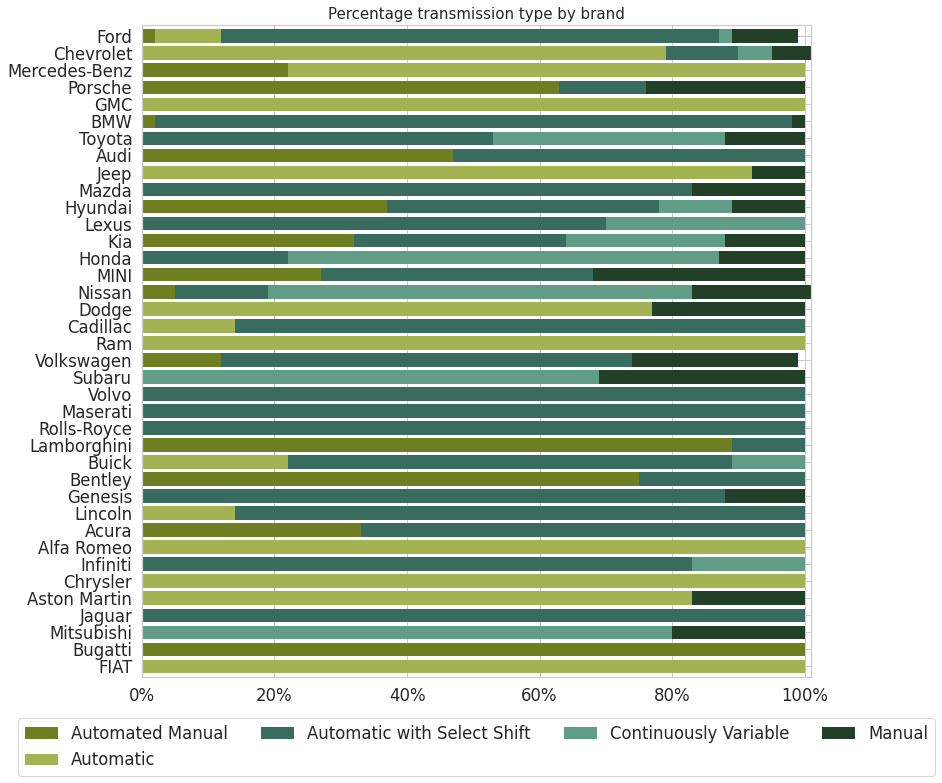

In [14]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

tr_chart = tr.pivot(index="brand", columns="transmission", values="percent")
tr_chart = tr_chart.reindex(brand.value_counts().index, axis=0)
g = tr_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage transmission type by brand", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [15]:
vc = df.groupby(["vehicle_class", "transmission"]).agg({"year": "count"})
vc['percent'] = vc.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
vc = vc.reset_index()
vc

,vehicle_class,transmission,year,percent
0,Compact,Automated Manual,9,0.11
1,Compact,Automatic,11,0.13
2,Compact,Automatic with Select Shift,32,0.39
3,Compact,Continuously Variable,14,0.17
4,Compact,Manual,17,0.20
5,Full-size,Automated Manual,18,0.28
6,Full-size,Automatic,12,0.18
7,Full-size,Automatic with Select Shift,23,0.35
8,Full-size,Continuously Variable,8,0.12
9,Full-size,Manual,4,0.06


In [16]:
vc_fuel = df.groupby(["vehicle_class", "fuel_type"]).agg({"year": "count"})
vc_fuel['percent'] = vc_fuel.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
vc_fuel = vc_fuel.reset_index()
vc_fuel

,vehicle_class,fuel_type,year,percent
0,Compact,Premium Gasoline,46,0.55
1,Compact,Regular Gasoline,37,0.45
2,Full-size,Premium Gasoline,40,0.62
3,Full-size,Regular Gasoline,25,0.38
4,Mid-size,Premium Gasoline,60,0.53
5,Mid-size,Regular Gasoline,54,0.47
6,Minicompact,Premium Gasoline,30,1.00
7,Minivan,Regular Gasoline,7,1.00
8,Pickup truck: Small,Diesel,5,0.29
9,Pickup truck: Small,Regular Gasoline,12,0.71


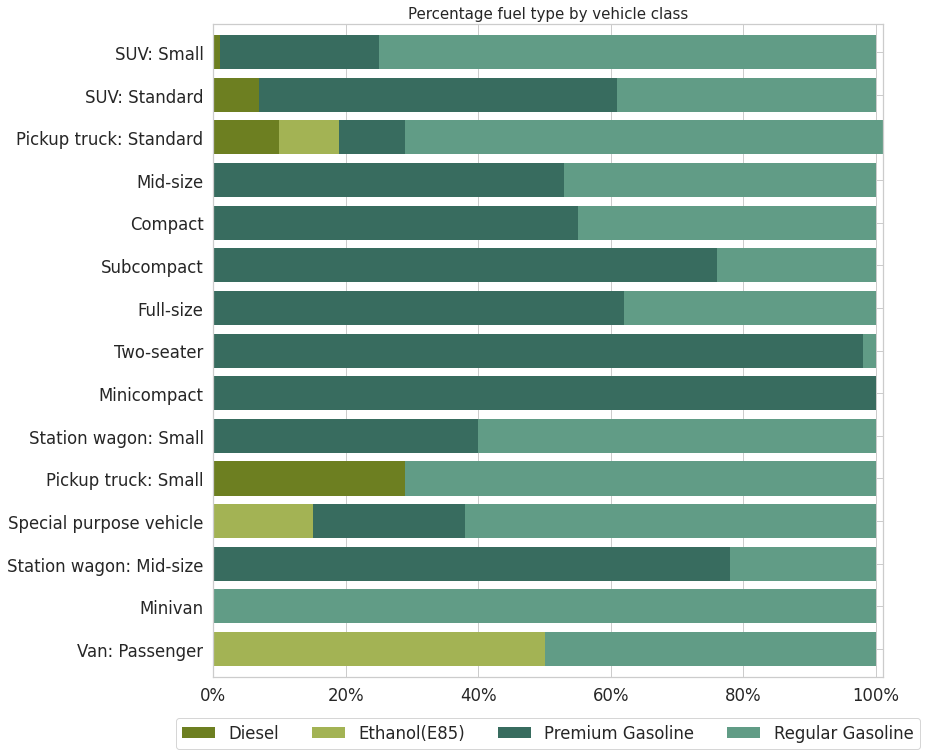

In [17]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

vc_fuel_chart = vc_fuel.pivot(index="vehicle_class", columns="fuel_type", values="percent")
vc_fuel_chart = vc_fuel_chart.reindex(df["vehicle_class"].value_counts().index, axis=0)
g = vc_fuel_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage fuel type by vehicle class", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

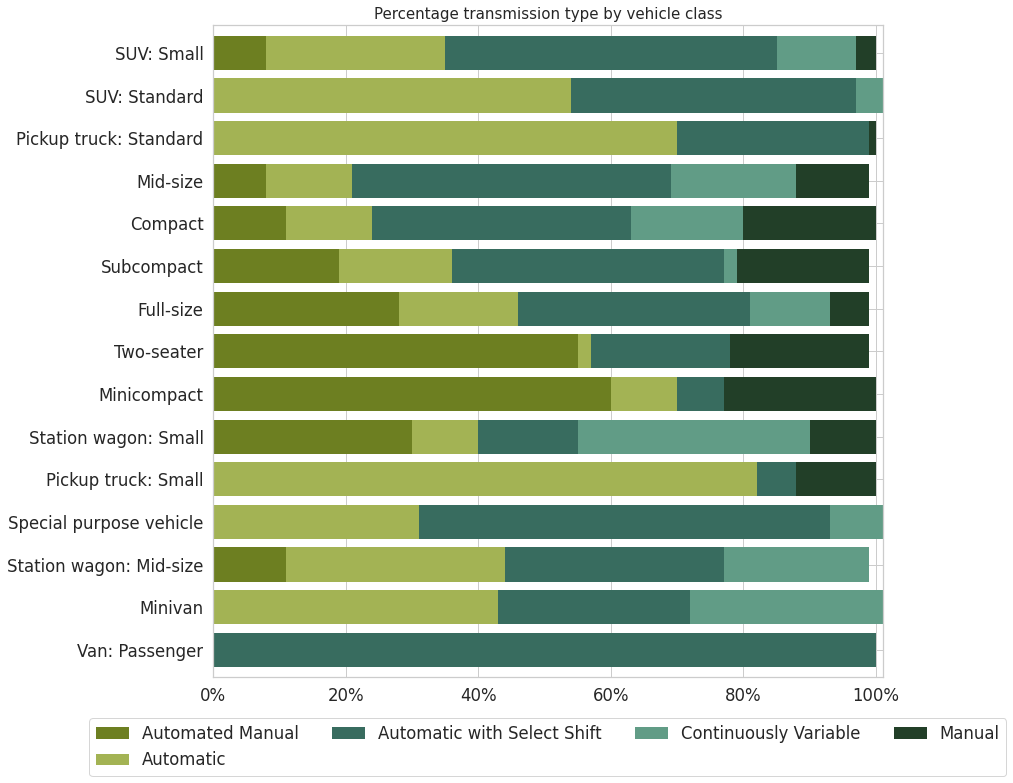

In [18]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

vc_chart = vc.pivot(index="vehicle_class", columns="transmission", values="percent")
vc_chart = vc_chart.reindex(df["vehicle_class"].value_counts().index, axis=0)
g = vc_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage transmission type by vehicle class", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

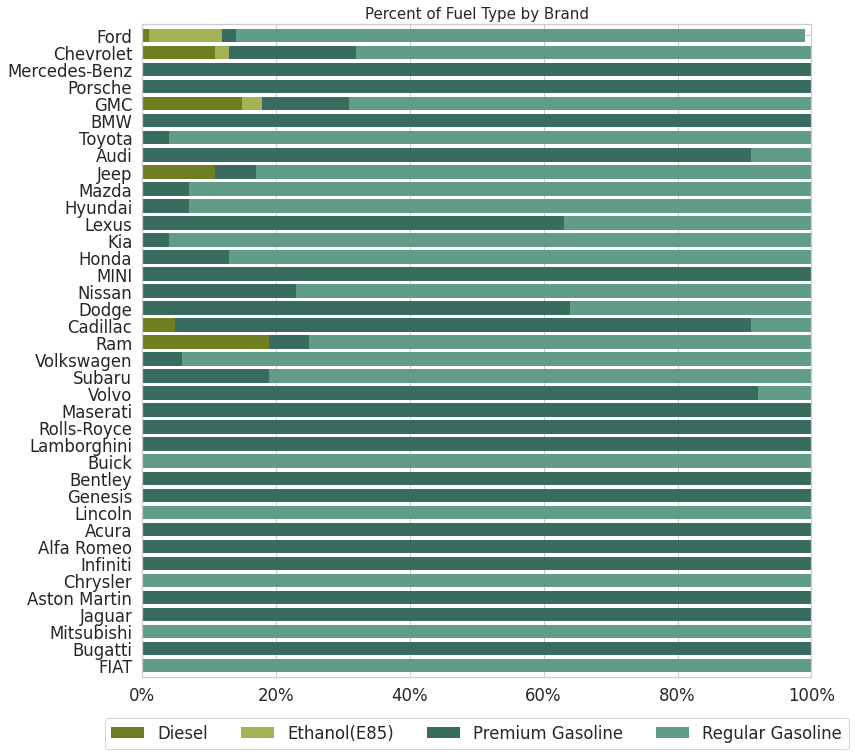

In [19]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

df_chart = dd.pivot(index="brand", columns="fuel_type", values="percent")
df_chart = df_chart.reindex(brand.value_counts().index, axis=0)
g = df_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.margins(x=0)
plt.title("Percent of Fuel Type by Brand", fontsize=15)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

Text(0.5, 1.0, 'Brand Count')

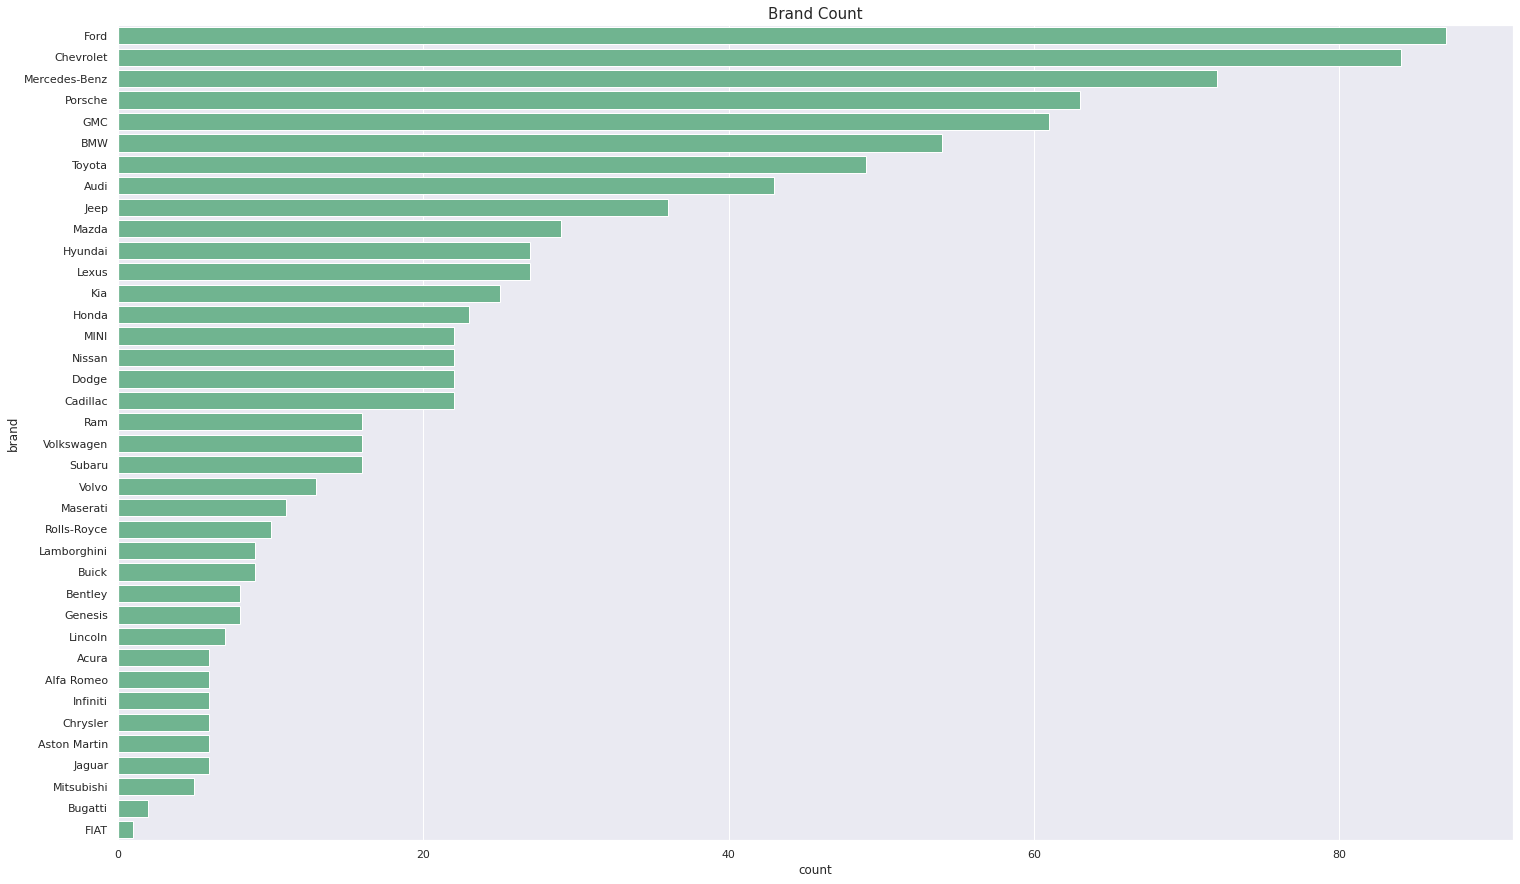

In [20]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.countplot(y="brand", data=df, color="#65BF8F",order = brand.value_counts().index)
plt.title("Brand Count", fontsize=15)

transmission
Automatic with Select Shift    362
Automatic                      282
Automated Manual               124
Continuously Variable           86
Manual                          81
Name: transmission, dtype: int64


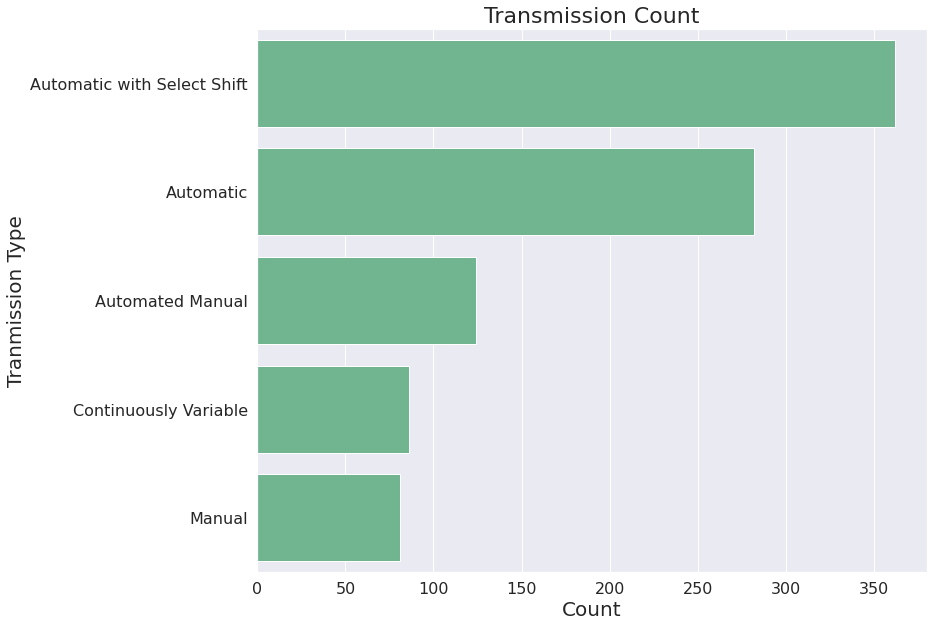

In [21]:
sns.set(rc = {'figure.figsize':(12,10)})
tr_count = df.groupby("transmission")["transmission"].count().sort_values(ascending=False)
#tr_count.plot(kind="bar", color="#65BF8F")
sns.countplot(y=df["transmission"], data=df, color="#65BF8F",order = df["transmission"].value_counts().index)
plt.title("Transmission Count", fontsize=22)
plt.ylabel("Tranmission Type", fontsize=20)
plt.xlabel("Count", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
print(tr_count)
plt.show()

fuel_type
Regular Gasoline    456
Premium Gasoline    438
Diesel               27
Ethanol(E85)         14
Name: fuel_type, dtype: int64


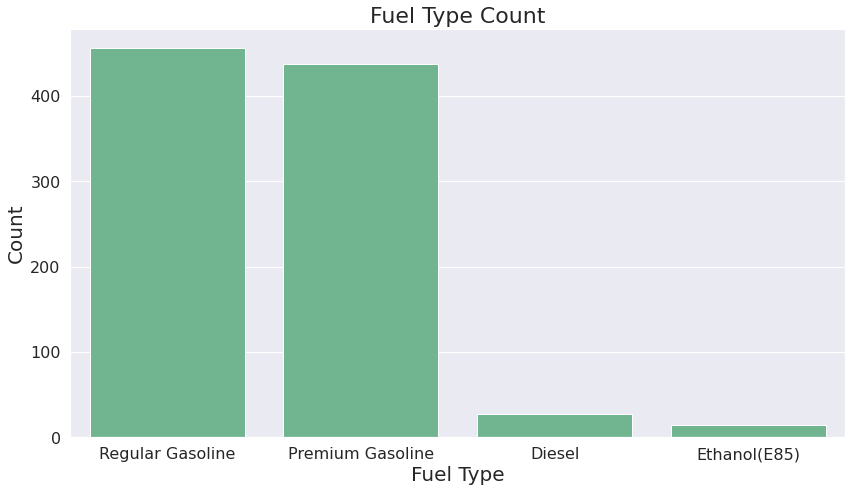

In [22]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_count = df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False)
#ft_count.plot(kind="bar", color="#65BF8F")
sns.countplot(x=df["fuel_type"], data=df, color="#65BF8F",order = df["fuel_type"].value_counts().index)
plt.title("Fuel Type Count", fontsize=22)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Fuel Type", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
print(ft_count)
plt.show()

Text(0, 0.5, 'Transmission')

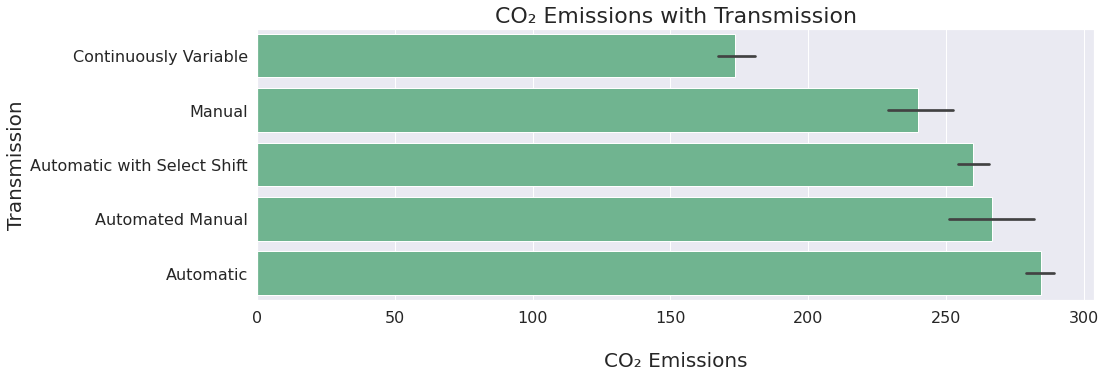

In [23]:
emission_transmission = df.groupby(["transmission"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(y = "transmission",x="co2_emissions", data = df, color="#65BF8F", order = list(emission_transmission["transmission"])) #  palette=sns.light_palette("seagreen", reverse=True) color="#24D139",
plt.title('CO₂ Emissions with Transmission', fontsize=22)
plt.xlabel('\nCO₂ Emissions', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Transmission', fontsize=20)

Text(0, 0.5, 'CO₂ Emissions')

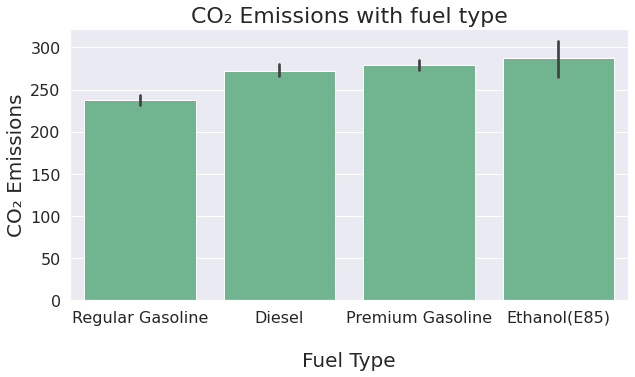

In [24]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = "fuel_type",y="co2_emissions", order=list(emission_fuel["fuel_type"]), color="#65BF8F", data = df) # palette=sns.dark_palette("seagreen", reverse=True)
plt.title('CO₂ Emissions with fuel type', fontsize=22)
plt.xlabel('\nFuel Type', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('CO₂ Emissions', fontsize=20)

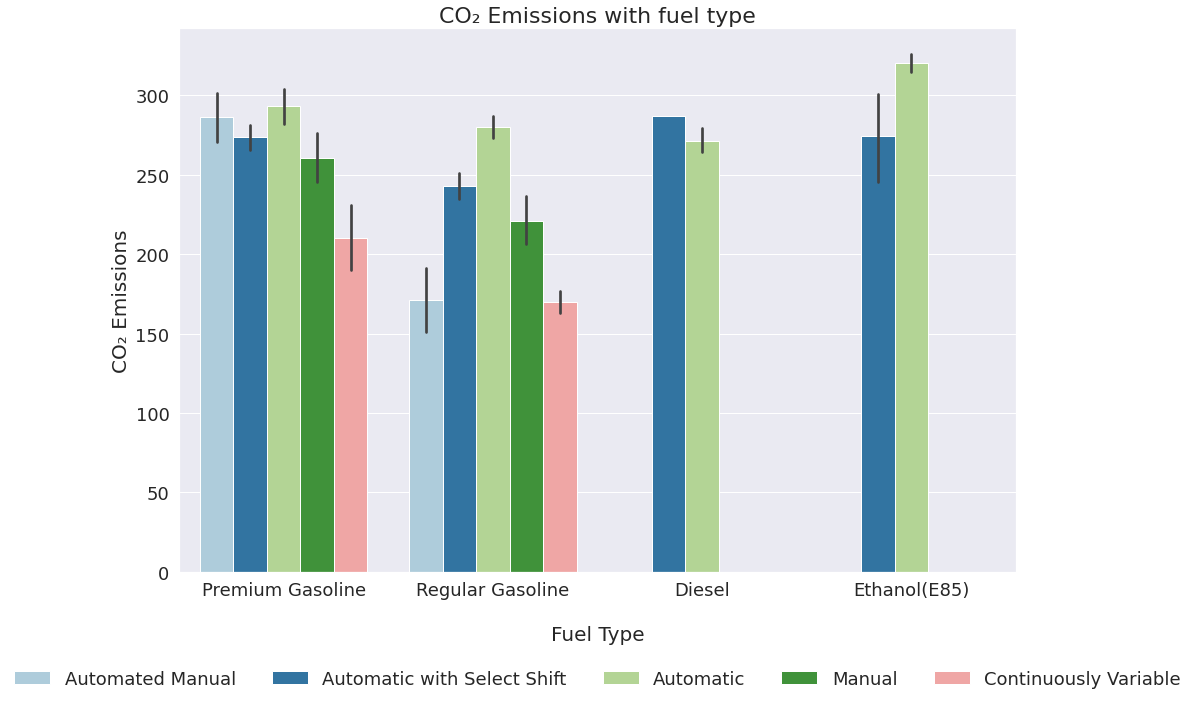

In [25]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,10)})
g = sns.barplot(x = "fuel_type",y="co2_emissions", hue="transmission", data = df,palette="Paired")
            # palette=sns.dark_palette("seagreen", reverse=True)
plt.title('CO₂ Emissions with fuel type', fontsize=22)
plt.xlabel('\nFuel Type', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize = 18)
plt.ylabel('CO₂ Emissions', fontsize=20)
plt.yticks(fontsize = 18)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=18, frameon=False, fancybox=False, shadow=False)

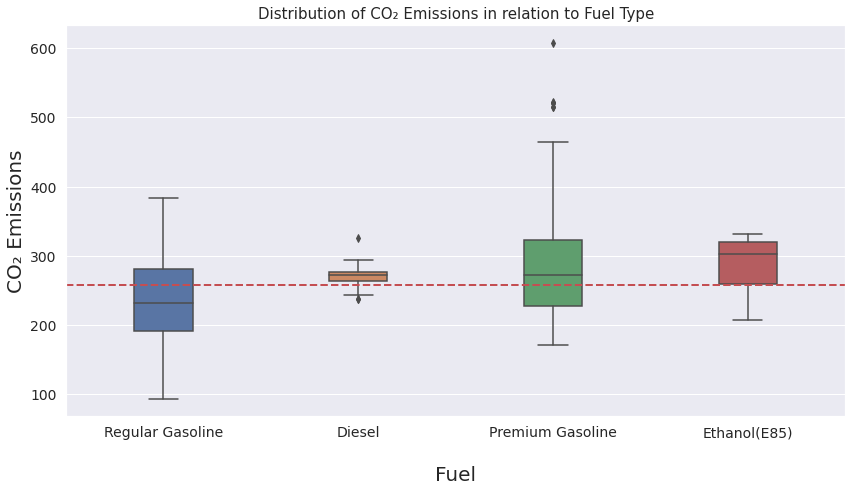

In [26]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(horizontalalignment='center', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\nFuel", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

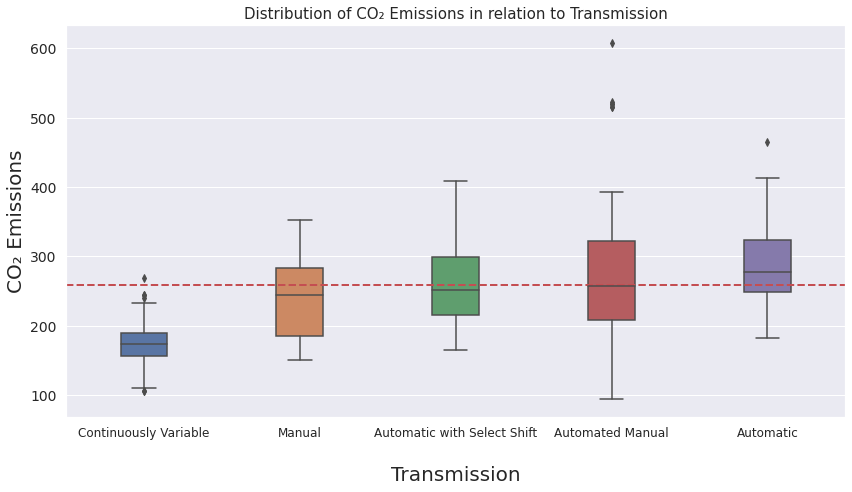

In [27]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Transmission", fontsize=15)
plt.xticks(horizontalalignment='center', fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel("\nTransmission", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

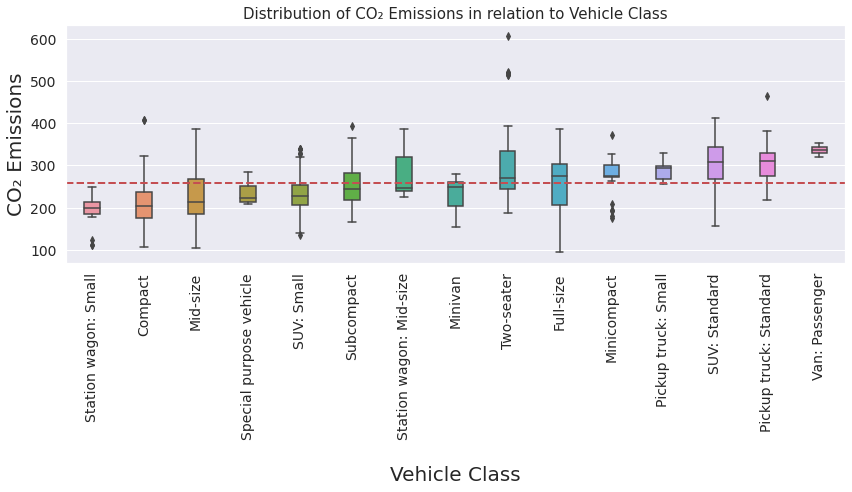

In [28]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\nVehicle Class", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

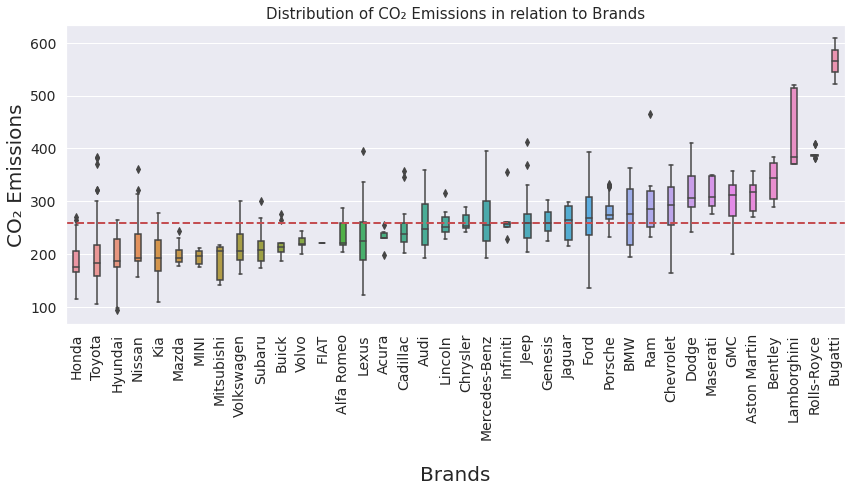

In [29]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("brand")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="brand", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Brands", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center', fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel("\nBrands", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

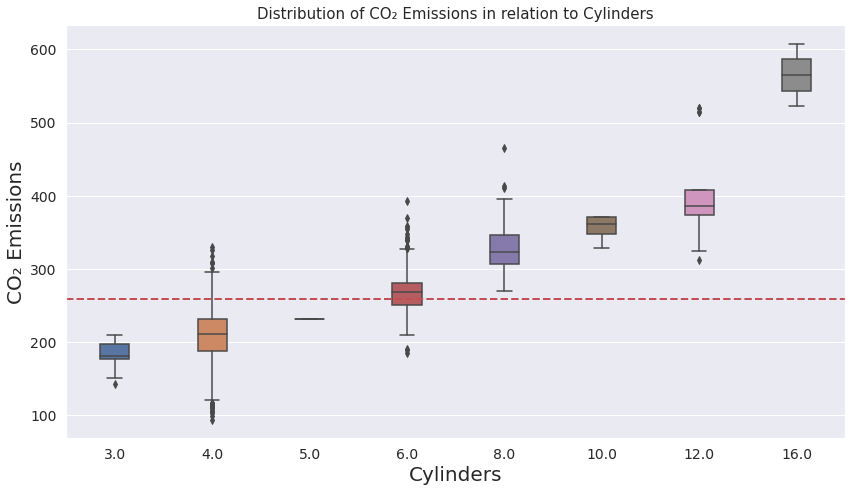

In [30]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Cylinders", fontsize=15)
plt.xticks(horizontalalignment='center', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Cylinders", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

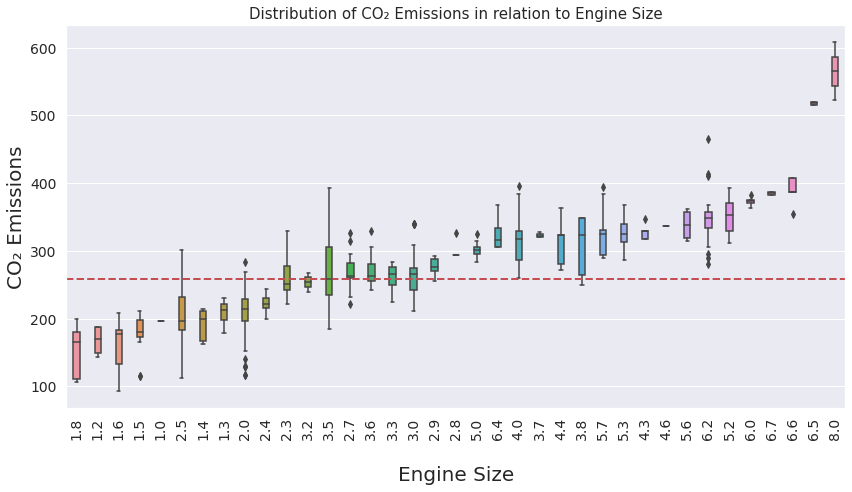

In [31]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("engine_size")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Engine Size", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center', fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel("\nEngine Size", fontsize=20)
plt.ylabel("CO₂ Emissions", fontsize=20)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [32]:
dd = df[["engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"]]
dd.corr()

,engine_size,cylinders,fuel_consumption,Hwy,Comb,Comb_mpg,co2_emissions,co2_rating,smog_rating
engine_size,1.000000,0.918483,0.833345,0.748928,0.817541,-0.707183,0.825725,-0.781292,-0.504544
cylinders,0.918483,1.000000,0.842551,0.742968,0.821770,-0.694915,0.834972,-0.770964,-0.532742
fuel_consumption,0.833345,0.842551,1.000000,0.926625,0.991267,-0.905265,0.966137,-0.922594,-0.573210
Hwy,0.748928,0.742968,0.926625,1.000000,0.967835,-0.883300,0.933468,-0.895023,-0.490750
Comb,0.817541,0.821770,0.991267,0.967835,1.000000,-0.912985,0.971241,-0.928887,-0.555426
Comb_mpg,-0.707183,-0.694915,-0.905265,-0.883300,-0.912985,1.000000,-0.909713,0.949028,0.519362
co2_emissions,0.825725,0.834972,0.966137,0.933468,0.971241,-0.909713,1.000000,-0.957189,-0.583690
co2_rating,-0.781292,-0.770964,-0.922594,-0.895023,-0.928887,0.949028,-0.957189,1.000000,0.555065
smog_rating,-0.504544,-0.532742,-0.573210,-0.490750,-0.555426,0.519362,-0.583690,0.555065,1.000000


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


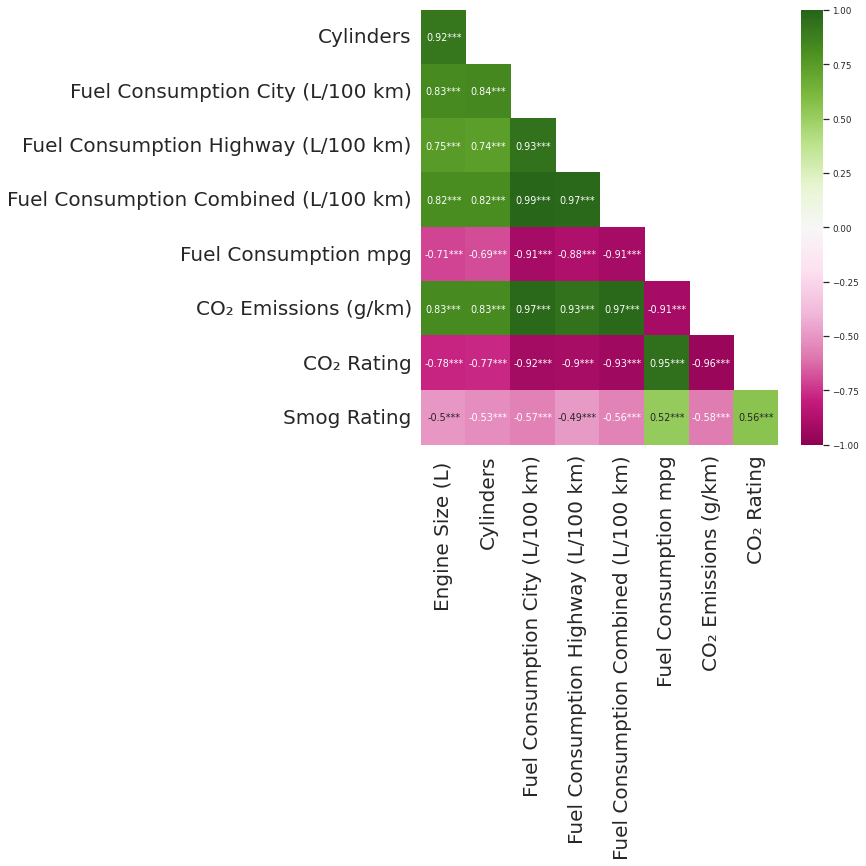

In [33]:
corr_m = dd.corr()

rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

# np.fill_diagonal(corr_m.values, np.nan)
labels_m = ['Engine Size (L) ', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Highway (L/100 km)','Fuel Consumption Combined (L/100 km)' ,'Fuel Consumption mpg','CO₂ Emissions (g/km)','CO₂ Rating','Smog Rating']
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

sns.set(font_scale=0.8, rc={"figure.figsize": (8, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"

g = sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=p, cmap="PiYG", fmt="")

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import pairwise_distances_argmin


In [35]:
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_values = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values
y_values = df[["co2_emissions"]].values

X_values = np.concatenate((X_values, pd.get_dummies(df["fuel_type"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type
X_values = np.concatenate((X_values, pd.get_dummies(df["transmission"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type

X = scaler.fit_transform(X_values)
y = scaler.fit_transform(y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [36]:
X_train.shape

(626, 15)

In [37]:
tmp = df.sample(100)

display(pd.DataFrame(tmp["fuel_type"]))

display(pd.get_dummies(tmp["fuel_type"], drop_first=True))

,fuel_type
484,Premium Gasoline
933,Premium Gasoline
363,Premium Gasoline
276,Regular Gasoline
67,Premium Gasoline
...,...
578,Regular Gasoline
220,Regular Gasoline
284,Regular Gasoline
509,Regular Gasoline


,Ethanol(E85),Premium Gasoline,Regular Gasoline
484,0,1,0
933,0,1,0
363,0,1,0
276,0,0,1
67,0,1,0
...,...,...,...
578,0,0,1
220,0,0,1
284,0,0,1
509,0,0,1


In [38]:
X_values.shape

(935, 15)

In [39]:
#Kmeans analysis
n_clusters = 3

rng = np.random.RandomState(150)
i = rng.permutation(X_values.shape[0])[:n_clusters]
centers = X_values[i]
print(i)
print(centers)

[469 714 291]
[[ 2.   4.  10.8  9.2 10.1 28.   5.   5.   0.   0.   1.   0.   1.   0.
   0. ]
 [ 2.   4.  10.2  7.1  8.8 32.   6.   7.   0.   1.   0.   0.   0.   0.
   1. ]
 [ 2.5  4.   5.5  6.4  5.9 48.   8.   7.   0.   0.   1.   0.   0.   1.
   0. ]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


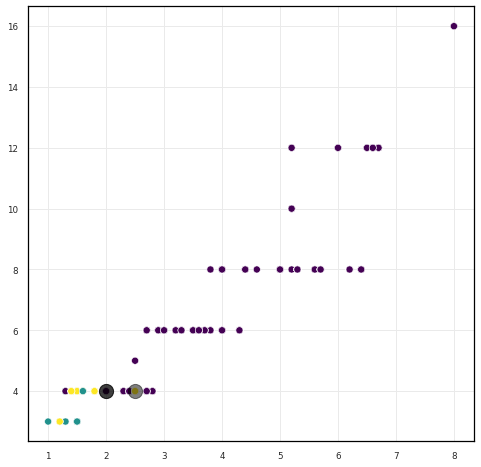

In [40]:
labels = pairwise_distances_argmin(X_values, centers)

sns.scatterplot(X_values[:, 0], X_values[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [41]:
## PCA Analysis

In [42]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.587177,-0.868581,-0.745569,-1.041347,-0.858565,0.731844,1.001713,-1.008761,-0.123292,1.065224,-0.975696,-0.657155,-0.794835,-0.31827,-0.307974
1,0.205462,0.143411,-0.401276,0.674512,-0.021013,-0.174137,-0.217820,-1.008761,-0.123292,1.065224,-0.975696,-0.657155,-0.794835,-0.31827,-0.307974
2,-0.875409,-0.868581,-0.429967,-0.318880,-0.404891,0.214141,0.391946,0.744383,-0.123292,1.065224,-0.975696,-0.657155,1.258123,-0.31827,-0.307974
3,-0.875409,-0.868581,-0.343894,-0.093109,-0.265299,-0.044711,0.391946,0.744383,-0.123292,1.065224,-0.975696,-0.657155,1.258123,-0.31827,-0.307974
4,-0.875409,-0.868581,-0.372585,-0.589805,-0.439789,0.214141,0.391946,1.328765,-0.123292,1.065224,-0.975696,-0.657155,1.258123,-0.31827,-0.307974


Text(0, 0.5, 'Explained Variance Ratio')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


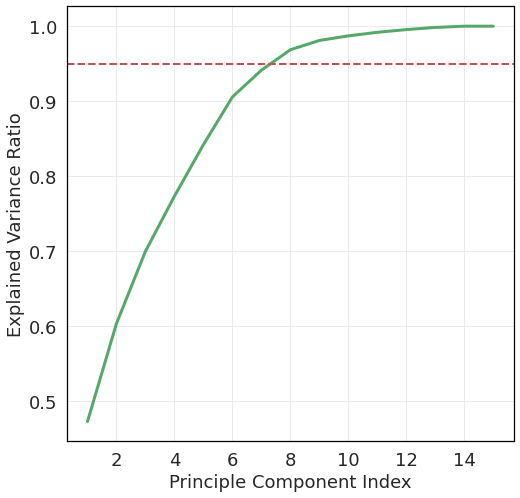

In [43]:
strPCA = []
nCompPca = []
for x in range (1, X.shape[1] + 1):
  pca = PCA(n_components=x)
  X_pca = pca.fit_transform(X)
  strPCA.append (pca.explained_variance_ratio_.sum())
  nCompPca.append(x)
plt.plot(nCompPca,strPCA,linewidth=3.0, color = 'g')

plt.axhline(0.95, color='r', linestyle='dashed',linewidth=2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('Principle Component Index', fontsize=18)
plt.ylabel('Explained Variance Ratio',fontsize=18 )


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


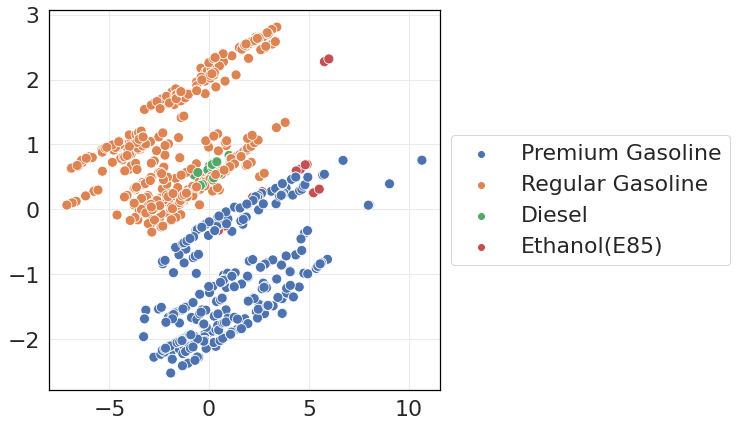

In [44]:
sns.set(font_scale=2, rc={"figure.figsize": (7, 7)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"

g = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["fuel_type"], s=100)
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))


In [45]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_values = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values
X_values2 = df[["fuel_consumption"]].values
X_values3 = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values

y_values = df[["co2_emissions"]].values

X_values = np.concatenate((X_values, pd.get_dummies(df["fuel_type"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type
X_values = np.concatenate((X_values, pd.get_dummies(df["transmission"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type

X = scaler.fit_transform(X_values)
X2 = scaler.fit_transform(X_values2)
X3 = scaler.fit_transform(X_values3)
y = scaler.fit_transform(y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

output = []
for label, X_data in [("Data 1", X2), ("Data 2", X3), ("Data 3", X)]:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.33, random_state=0)
    for random_state in range(0, 50):
      models = [
        ("Decision Tree (Depth=3)", DecisionTreeRegressor(max_depth=3, random_state=random_state)),
        ("Decision Tree (Depth=4)", DecisionTreeRegressor(max_depth=4, random_state=random_state)),
        ("Linear Regression", LinearRegression()),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=random_state)), # https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
        ("AdaBoostRegressor (Default)", AdaBoostRegressor(random_state=random_state)),
        ("AdaBoostRegressor (DT)", AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, random_state=random_state), n_estimators=300, random_state=random_state))
      ]
      for name, model in models:
          reg = model.fit(X_train, np.ravel(y_train))

          y_pred = reg.predict(X_test)
          output.append({
              "name": name,
              "label": label,
              "r2_score": r2_score(y_test, y_pred),
              "explained_variance_score": explained_variance_score(y_test, y_pred)
          })

In [46]:
pd.DataFrame(output).groupby(["name", "label"]).agg({"r2_score": "mean"})

r2_score
name                        label           
AdaBoostRegressor (DT)      Data 1  0.925554
                            Data 2  0.981890
                            Data 3  0.982047
AdaBoostRegressor (Default) Data 1  0.912759
                            Data 2  0.968150
                            Data 3  0.968390
Decision Tree (Depth=3)     Data 1  0.910047
                            Data 2  0.931640
                            Data 3  0.931640
Decision Tree (Depth=4)     Data 1  0.930476
                            Data 2  0.969128
                            Data 3  0.969133
Gradient Boosting           Data 1  0.937356
                            Data 2  0.985278
                            Data 3  0.988087
Linear Regression           Data 1  0.916972
                            Data 2  0.961004
                            Data 3  0.997878

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


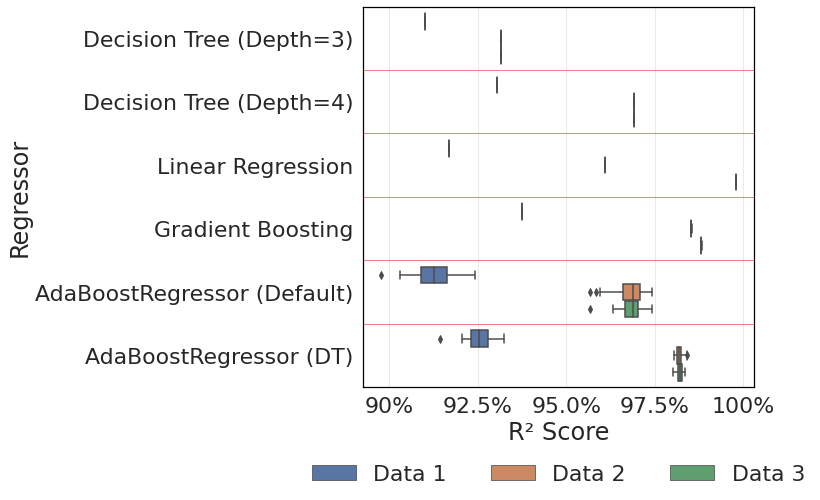

In [47]:
g = sns.boxplot(x="r2_score", y="name", hue="label", data=pd.DataFrame(output))
g.set_ylabel("Regressor")
g.set_xlabel("R² Score")

g.set_xticklabels([f"{round(x * 100, 1) if (x * 100) % 2 != 0 else int(x * 100)}%" for x in g.get_xticks()])

for i in range(5):
    g.axhline(i + 0.5, color='red', lw=1, alpha=0.5)

g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=False, frameon=False, shadow=False, ncol=5)

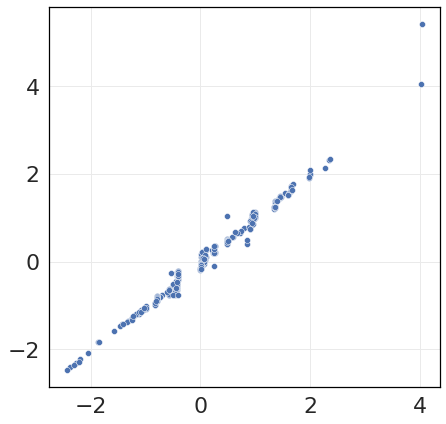

In [48]:
sns.scatterplot(x=np.ravel(y_pred), y=np.ravel(y_test))
